In [227]:
import random
import math    
import copy    
import sys     
import numpy as np
import matplotlib.pyplot as plt

rnd = random.Random(100)

In [228]:
class Particula:
  def __init__(self, dim, minx, maxx):
    # definindo semente de aleatoriedade
    global rnd

    # Criando valores de position, velocidade e melhor posição da particula (pbest) 
    self.X = 0.0 
    self.V = 0.0
    self.pbest = 0.0
    self.I = 1.0

    self.X = ((maxx - minx) * rnd.random() + minx)
    self.V = ((maxx - minx) * rnd.random() + minx)

    self.pbest = copy.copy(self.X) 


In [229]:
def function(x):
  y = (12*(x ** 5) - 975*(x ** 4) + 28000*(x ** 3) - 345000*(x ** 2) + 1800000*x)/1000000

  return y

In [230]:
def inicializate():
  x = np.linspace(0,31,100)
  y = function(x)

  x_min = 0
  x_max = 31
  dim = 1
  
  n = 10

  particulas = [Particula( dim, x_min, x_max) for i in range(n)]

  return x,y,particulas


In [231]:
def plotando_particulas(x,y,particulas):
  fig,ax = plt.subplots(figsize = (12,8))

  lin_plot = ax.plot(x,y)
  X = [particula.X for particula in particulas]
  X = np.asarray(X)
  Y = function(X)

  plt.scatter(X,Y, marker='o', color='black', alpha=0.5)
  plt.plot(x,y, color='blue')
  plt.show()

In [232]:
def update_sistem(particulas):
  global rnd

  def updating_particle(particula):
    particula.X = particula.X + particula.V

    if particula.X > 31:
      particula.X = 31

    elif particula.X < 0:
      particula.X = 0
    
    return particula

  def updating_velocity(particula,g_best):
    prim = w*particula.V
    seg =  rnd.random()*(particula.pbest - particula.X)
    terc = c2*rnd.random()*(g_best-particula.X)

    new_velocity = prim + seg + terc

    particula.V = new_velocity

    return particula

  def updating_gbest(particulas):
    X = [particula.X for particula in particulas]
    X = np.asarray(X)

    Y = function(X)
    g_best = np.argmax(Y)
    g_best = particulas[g_best].X
  
    return(g_best)

  def updating_pbest(particula):
    if function(particula.X) > function(particula.pbest):
      particula.I = function(particula.X) - function(particula.pbest)
      particula.pbest = particula.X

    return particula
    
  w = 0.5
  c1,c2 = 0.5,0.5

  g_best = updating_gbest(particulas)
  particulas = [updating_velocity(particula,g_best) for particula in particulas]
  particulas = [updating_particle(particula) for particula in particulas]
  particulas = [updating_pbest(particula) for particula in particulas]

  return g_best

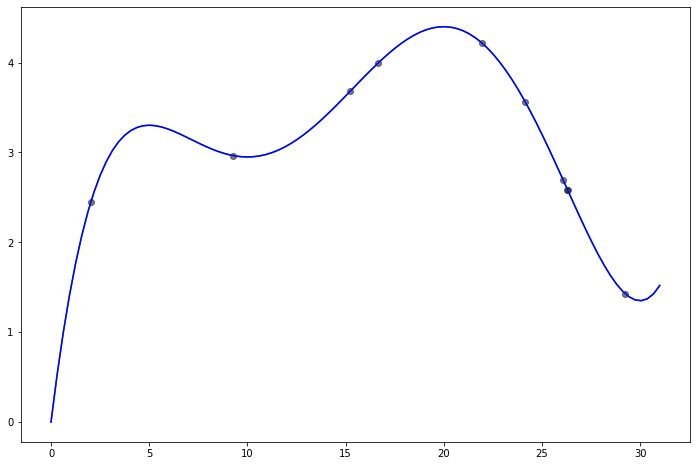

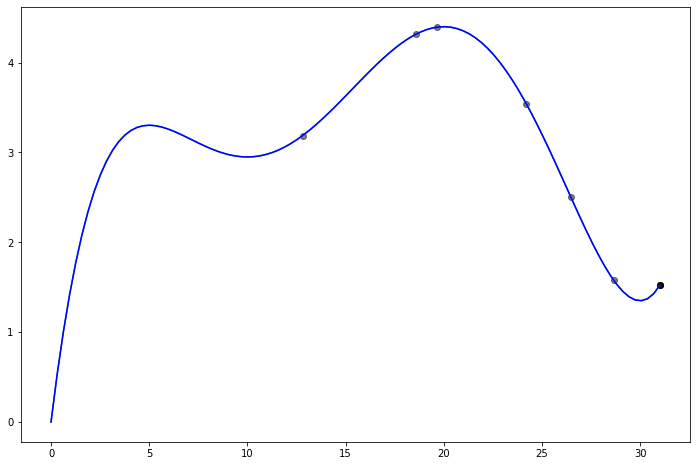

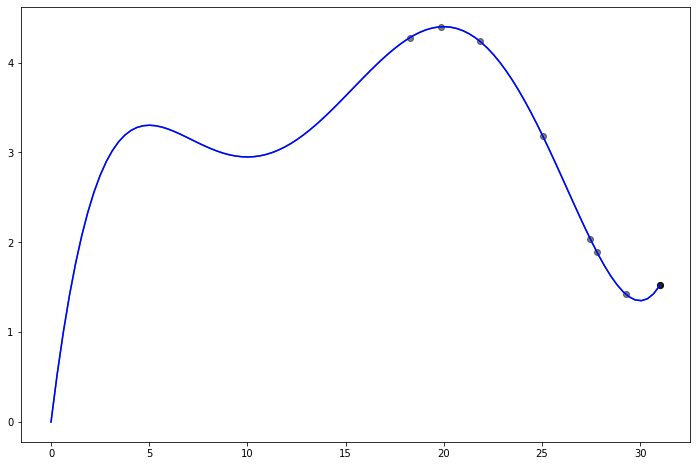

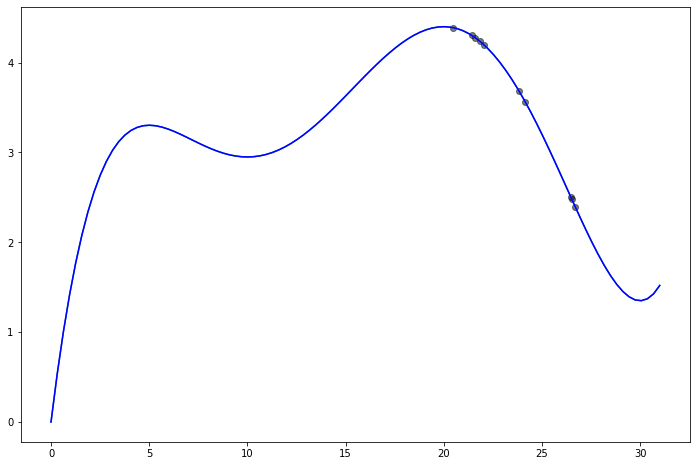

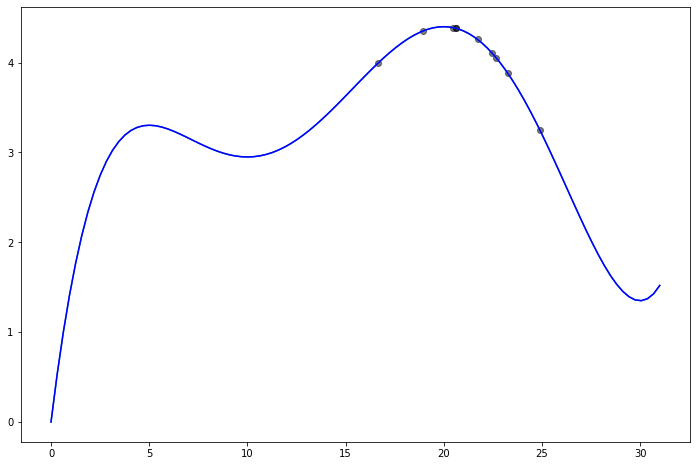

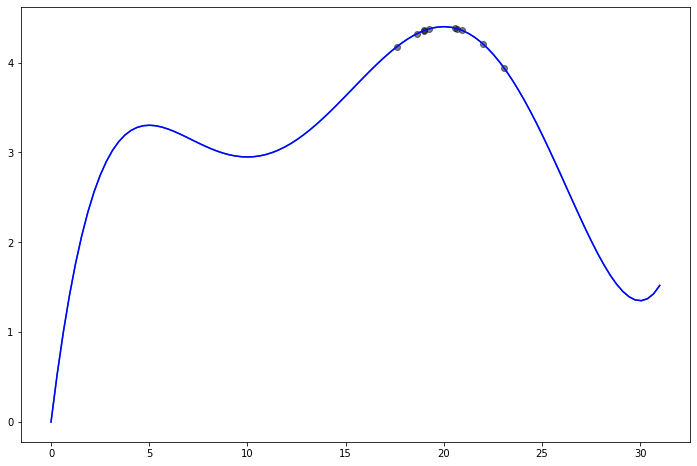

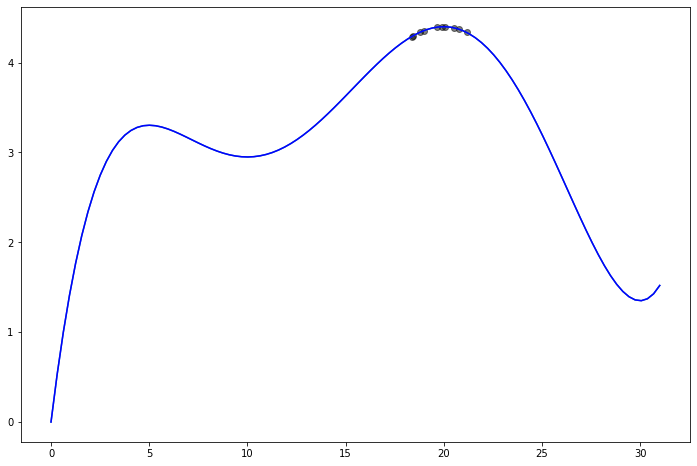

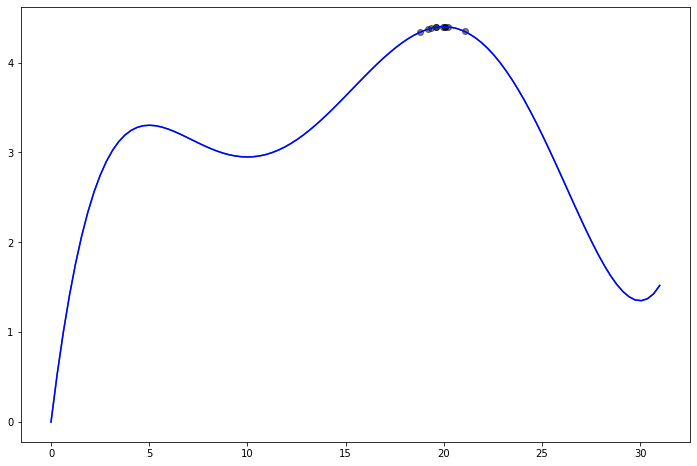

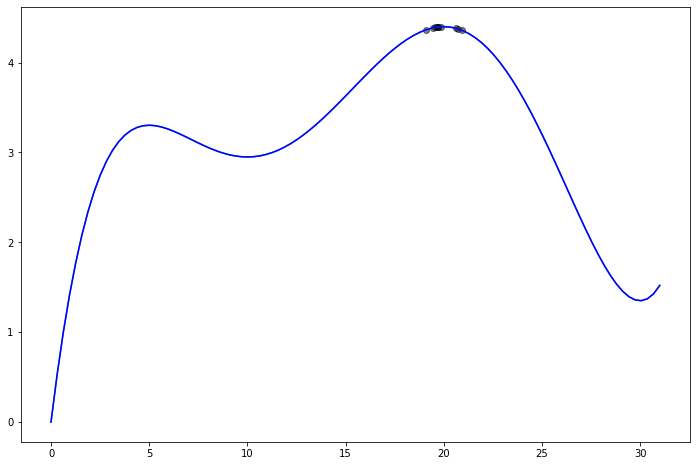

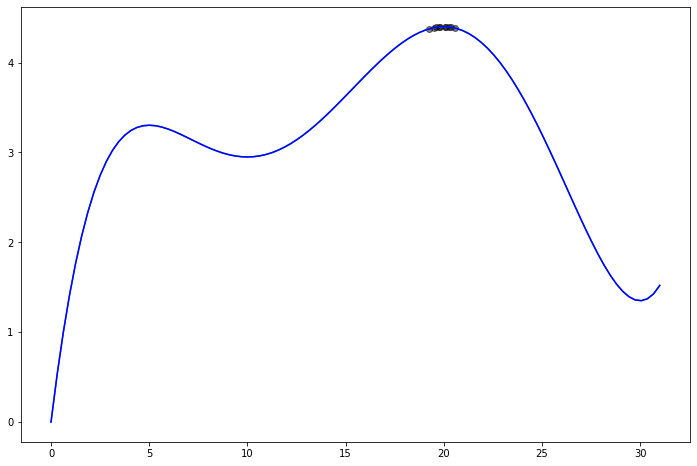

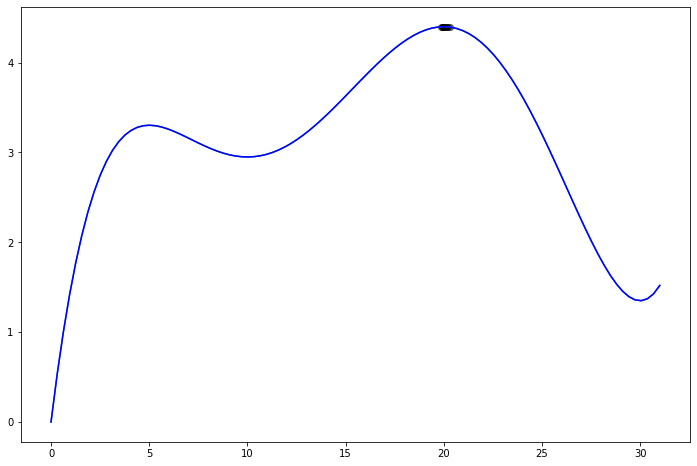

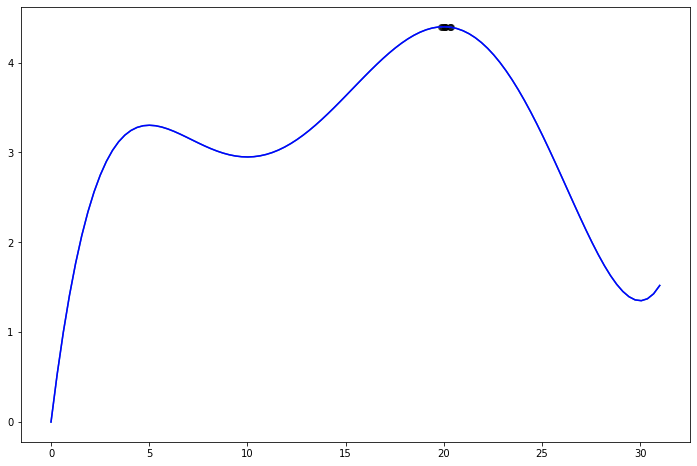

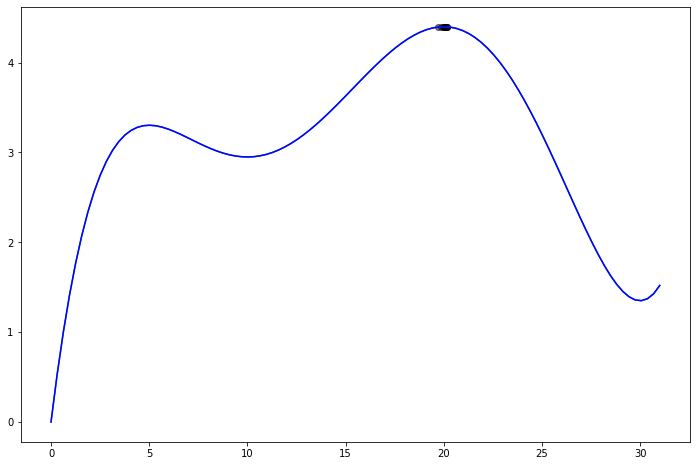

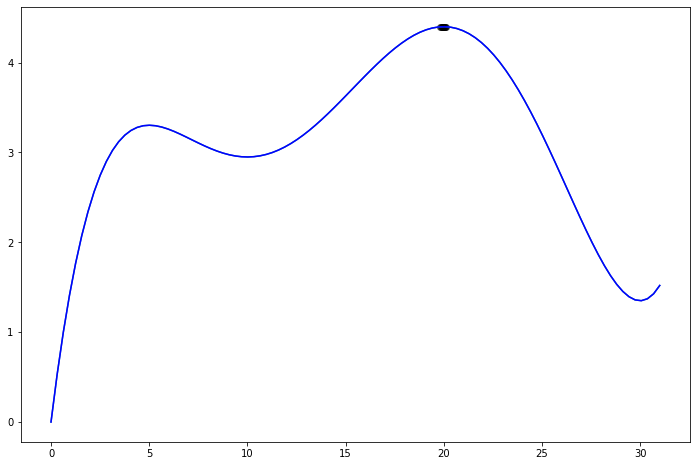

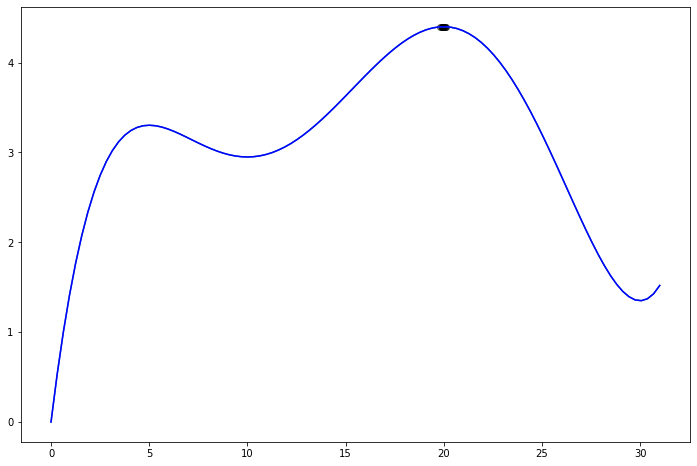

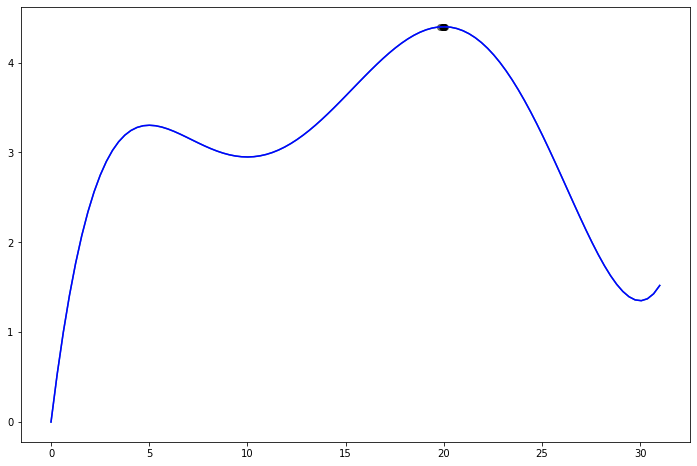

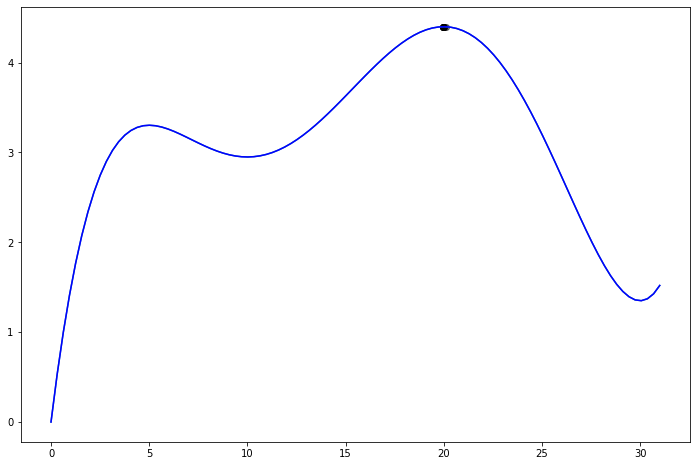

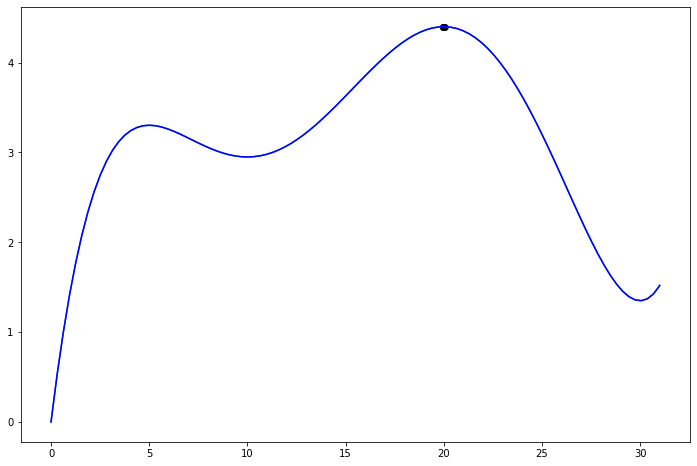

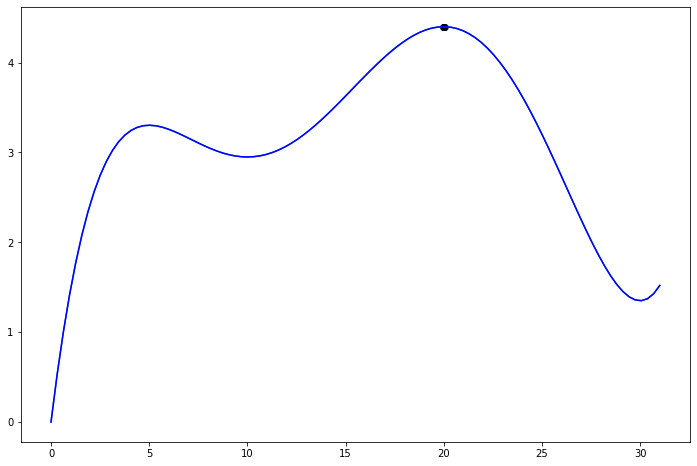

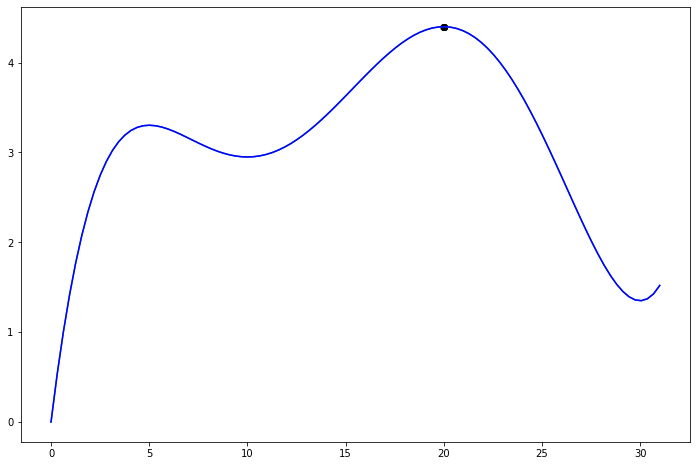

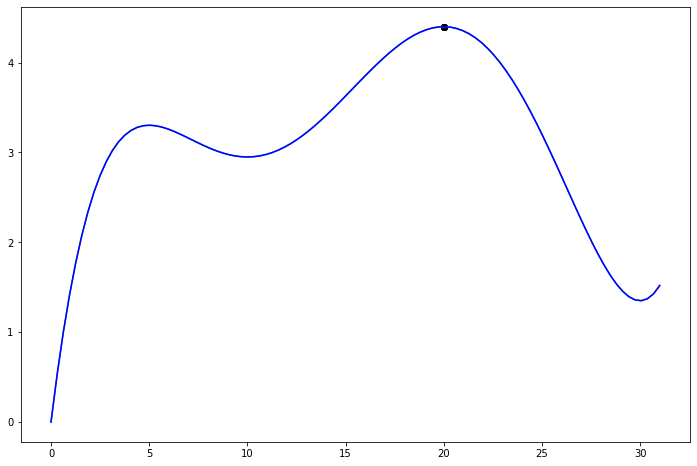

Tivemos 22 iterações antes de atingir o critério de parada


In [239]:
x,y,particulas = inicializate()
imp = list()
i = 0

while(True):
  plotando_particulas(x,y,particulas)
  i += 1
  imp = list()

  for particula in particulas:
    imp.append(particula.I)
  
  if np.max(imp) < 0.0001:
    break
  
  update_sistem(particulas)
  
print(f"Tivemos {i+1} iterações antes de atingir o critério de parada")
  
  
  
